# Tabelle
- Parametri utilizzati dai modelli
- Statistiche del dataset (quanti esempi ci sono in totale, quanti commenti/post/notizie da ogni risorsa e il numero medio, il numero totale di token di tutto il dataset (con quello di chatGPT: https://github.com/openai/tiktoken))
- Risultati finali (2 strategie di classification)

# Parametri utilizzati dai modelli

In [1]:
import sys
ROOT = '../'
sys.path.append(ROOT)  # Add the root folder to the sys.path

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from config import *

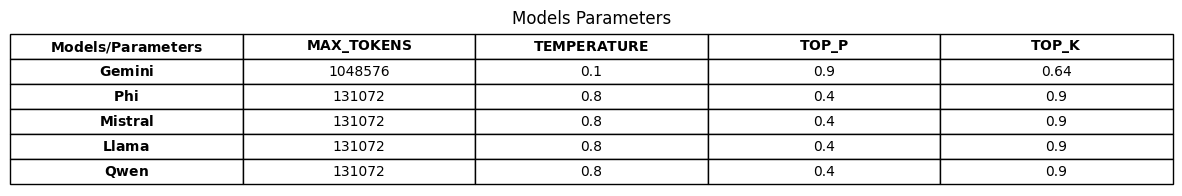

In [4]:


# Define the new data structure for models and their parameters
data = {
    r"$\mathbf{Models / Parameters}$": [r"$\mathbf{Gemini}$", r"$\mathbf{Phi}$", r"$\mathbf{Mistral}$", r"$\mathbf{Llama}$", r"$\mathbf{Qwen}$"],
    r"$\mathbf{MAX\_TOKENS}$": [1048576, 131072, 131072, 131072, 131072],
    r"$\mathbf{TEMPERATURE}$": [0.1, 0.8, 0.8, 0.8, 0.8],
    r"$\mathbf{TOP\_P}$": [0.9, 0.4, 0.4, 0.4, 0.4],
    r"$\mathbf{TOP\_K}$": [0.64, 0.9, 0.9, 0.9, 0.9]
}

# Create a dataframe
df = pd.DataFrame(data)

# Create a figure and axis for displaying the table
fig, ax = plt.subplots(figsize=(10, 2))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust table scale for better readability
table.scale(1.5, 1.5)

# Set a title for the table
plt.title("Models Parameters")

# Display the table
plt.show()

# Save the plot as pdf file
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "models_parameters.pdf")
fig.savefig(path, bbox_inches='tight')
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "models_parameters.png")
fig.savefig(path, bbox_inches='tight')

# Statistiche del dataset 

Quanti esempi ci sono in totale, quanti commenti/post/notizie da ogni risorsa e il numero medio, il numero totale di token di tutto il dataset (con quello di chatGPT: https://github.com/openai/tiktoken))

In [5]:
import sys
ROOT = '../'
sys.path.append(ROOT)  # Add the root folder to the sys.path

In [6]:
import os
import pandas as pd

In [7]:
from config import *

In [8]:
# Load merged dataset from the file
path = os.path.join(ROOT, MERGED_DATASET_PATH, "merged_daily.csv")
df = pd.read_csv(path)

# Display the first 5 rows of the dataset
df.head()

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,fng_sentiment,cbbi_value,cbbi_sentiment,cointelegraph,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend
0,2016-01-01,429.17,429.74,431.41,429.17,163.677972,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.29,negative,[],"[[8955, '2016-01-01 16:00:37', 'EU Taxpayers N...","[['u/CallMeMakaveliBruh', '[VENDOR REVIEW] Psy...",429.8725,434.6250,1.105560,same
1,2016-01-02,433.89,434.92,435.80,433.89,808.207780,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.30,negative,"[[5990, 'why-bitcoin-price-changes', 3867, 'Wh...","[[8992, '2016-01-02 16:00:31', ""Got Unwanted G...","[['u/Cddoo', 'Users here now in this sub peaki...",434.6250,432.7025,-0.442335,same
2,2016-01-03,432.66,432.81,433.07,432.27,41.080683,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,"[[5993, 'newborn-kazakhstan-crypto-market', 10...","[[9057, '2016-01-03 16:00:42', 'Outernet Can B...","[['u/Aviathor', 'Happy Genesis Day!', 176, '20...",432.7025,428.2525,-1.028420,same
3,2016-01-04,428.63,427.58,429.30,427.50,487.587933,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,"[[5997, 'bitcoin-price-fluctuation-in-2015-and...","[[9100, '2016-01-04 18:00:59', ""Bitcoin Ecosys...","[['u/adam3us', 'review of shelling point proto...",428.2525,433.5200,1.229999,same
4,2016-01-05,432.61,434.15,434.91,432.41,248.305703,54936.400034,0.641779,101752002.0,1161.598726,...,NaN,0.30,negative,"[[6002, 'deloitte-blockchain-will-disrupt-your...","[[25349, '2016-01-05 18:25:09', 'A comparative...","[['u/Redditcoin', 'Next milestone: Fifth credi...",433.5200,431.5700,-0.449806,same


In [9]:
# Count the number of news, posts and comments (total and mean) for each source
# Count also the total number of tokens using ChatGPT tokenizer

import ast
from tqdm import tqdm

# Load the ChatGPT tokenizer
import tiktoken
enc = tiktoken.encoding_for_model("gpt-4")

# Select only the Cointelegraph, Bitcoin News and Reddit columns
df_filtered = df[['cointelegraph', 'bitcoin_news', 'reddit']]

# Initialize the counters
num_cointelegraph_news = 0
num_bitcoin_news = 0
num_posts = 0
num_comments = 0
num_tokens = 0

num_rows = len(df_filtered)

for row in tqdm(df_filtered.iterrows(), total=num_rows):
    cointelegraph = ast.literal_eval(row[1]['cointelegraph'])
    bitcoin_news = ast.literal_eval(row[1]['bitcoin_news'])
    reddit = ast.literal_eval(row[1]['reddit'])

    for news in cointelegraph:
        # Extract the title and the body of the news
        title = news[3]
        leadtext = news[5]
        body = news[6]

        # Tokenize the title, leadtext and body
        tokens_title = enc.encode(title)
        tokens_leadtext = enc.encode(leadtext)
        tokens_body = enc.encode(body)

        # Update the number of tokens
        num_tokens += len(tokens_title) + len(tokens_leadtext) + len(tokens_body)

        # Update the number of news
        num_cointelegraph_news += 1

    for news in bitcoin_news:
        title = news[2]
        text = news[5]

        tokens_title = enc.encode(title)
        tokens_text = enc.encode(text)

        # Update the number of tokens
        num_tokens += len(tokens_title) + len(tokens_text)
        
        # Update the number of tokens
        num_tokens += len(tokens_title) + len(tokens_text)

        # Update the number of news
        num_bitcoin_news += 1

    for post in reddit:
        title = post[1]
        post_text = post[5]

        comments = post[8] if post[8] != '[]' else []

        for comment in comments:
            comment_text = comment[4]

            tokens_comment = enc.encode(comment_text)
            num_tokens += len(tokens_comment)
            num_comments += 1

        tokens_title = enc.encode(title)
        tokens_post_text = enc.encode(post_text)

        # Update the number of tokens
        num_tokens += len(tokens_title) + len(tokens_post_text)

        # Update the number of posts
        num_posts += 1

100%|██████████| 3095/3095 [01:36<00:00, 32.16it/s]


In [10]:
# Count the number of rows and columns in the dataset
num_rows, num_cols = df.shape

# Calculate the mean number of news, posts, comments and tokens
mean_cointelegraph_news = num_cointelegraph_news / num_rows
mean_bitcoin_news = num_bitcoin_news / num_rows
mean_posts = num_posts / num_rows
mean_comments = num_comments / num_rows
mean_tokens = num_tokens / num_rows

# Round the mean values to 2 decimal places
mean_cointelegraph_news = round(mean_cointelegraph_news, 2)
mean_bitcoin_news = round(mean_bitcoin_news, 2)
mean_posts = round(mean_posts, 2)
mean_comments = round(mean_comments, 2)
mean_tokens = round(mean_tokens, 2)

# Display the computed values
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print()
print(f"Number of Cointelegraph news: {num_cointelegraph_news}")
print(f"Number of Bitcoin News: {num_bitcoin_news}")
print(f"Number of posts: {num_posts}")
print(f"Number of comments: {num_comments}")
print(f"Number of tokens: {num_tokens}")
print()
print(f"Mean number of Cointelegraph news: {mean_cointelegraph_news}")
print(f"Mean number of Bitcoin News: {mean_bitcoin_news}")
print(f"Mean number of posts: {mean_posts}")
print(f"Mean number of comments: {mean_comments}")
print(f"Mean number of tokens: {mean_tokens}")

Number of rows: 3095
Number of columns: 31

Number of Cointelegraph news: 22286
Number of Bitcoin News: 32937
Number of posts: 108066
Number of comments: 912333
Number of tokens: 173432709

Mean number of Cointelegraph news: 7.2
Mean number of Bitcoin News: 10.64
Mean number of posts: 34.92
Mean number of comments: 294.78
Mean number of tokens: 56036.42


In [11]:
# Write the results to a .csv file
path = os.path.join(ROOT, MERGED_DATASET_PATH, "dataset_statistics.csv")

df_statistics = pd.DataFrame({
    'Number of rows': [num_rows],
    'Number of columns': [num_cols],
    'Number of Cointelegraph news': [num_cointelegraph_news],
    'Number of Bitcoin News': [num_bitcoin_news],
    'Number of Reddit posts': [num_posts],
    'Number of Reddit comments': [num_comments],
    'Number of tokens': [num_tokens],
    'Mean number of Cointelegraph news': [mean_cointelegraph_news],
    'Mean number of Bitcoin News': [mean_bitcoin_news],
    'Mean number of Reddit posts': [mean_posts],
    'Mean number of Reddit comments': [mean_comments],
    'Mean number of tokens': [mean_tokens],
})

df_statistics.to_csv(path, index=False)

In [12]:
# Read the results from the file
path = os.path.join(ROOT, MERGED_DATASET_PATH, "dataset_statistics.csv")
df = pd.read_csv(path)
df

,Number of rows,Number of columns,Number of Cointelegraph news,Number of Bitcoin News,Number of Reddit posts,Number of Reddit comments,Number of tokens,Mean number of Cointelegraph news,Mean number of Bitcoin News,Mean number of Reddit posts,Mean number of Reddit comments,Mean number of tokens
0,3095,31,22286,32937,108066,912333,173432709,7.2,10.64,34.92,294.78,56036.42


In [13]:
# Save the values into variables
num_rows = df['Number of rows'][0]
num_cols = df['Number of columns'][0]

num_cointelegraph_news = df['Number of Cointelegraph news'][0]
num_bitcoin_news = df['Number of Bitcoin News'][0]
num_posts = df['Number of Reddit posts'][0]
num_comments = df['Number of Reddit comments'][0]
num_tokens = df['Number of tokens'][0]

mean_cointelegraph_news = df['Mean number of Cointelegraph news'][0]
mean_bitcoin_news = df['Mean number of Bitcoin News'][0]
mean_posts = df['Mean number of Reddit posts'][0]
mean_comments = df['Mean number of Reddit comments'][0]
mean_tokens = df['Mean number of tokens'][0]

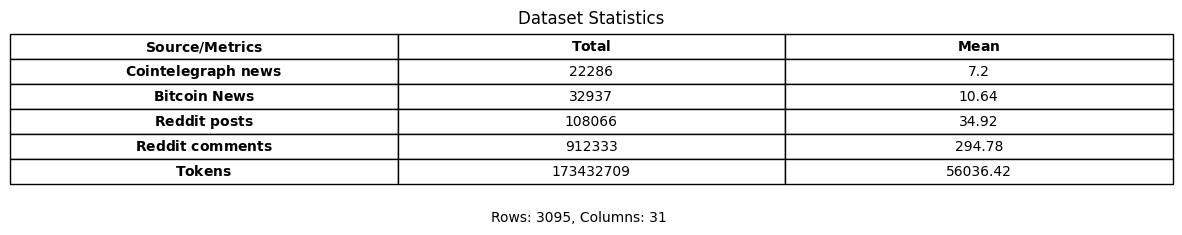

In [14]:
import matplotlib.pyplot as plt

# Define the data structure
data = {
    r"$\mathbf{Source / Metrics}$": [r"$\mathbf{Cointelegraph\ news}$", r"$\mathbf{Bitcoin\ News}$", r"$\mathbf{Reddit\ posts}$", r"$\mathbf{Reddit\ comments}$", r"$\mathbf{Tokens}$"],
    r"$\mathbf{Total}$": [num_cointelegraph_news, num_bitcoin_news, num_posts, num_comments, num_tokens],
    r"$\mathbf{Mean}$": [mean_cointelegraph_news, mean_bitcoin_news, mean_posts, mean_comments, mean_tokens]
}

# Create a dataframe
df = pd.DataFrame(data)

# Create a figure and axis for displaying the table
fig, ax = plt.subplots(figsize=(10, 2))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust table scale for better readability
table.scale(1.5, 1.5)

# Set a title for the table
plt.title(f"Dataset Statistics")

# Add a text below the table 
plt.figtext(0.5, -0.05, f"Rows: {num_rows}, Columns: {num_cols}", ha='center', va='center')

# Display the table
plt.show()

# Save the plot as pdf file
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "dataset_statistics.pdf")
fig.savefig(path, bbox_inches='tight')
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "dataset_statistics.png")
fig.savefig(path, bbox_inches='tight')

# Risultati finali (2 strategie di classification)

In [15]:
import sys
ROOT = '../'
sys.path.append(ROOT)  # Add the root folder to the sys.path

In [16]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
from config import *

In [18]:
# Load the datasets
df_phi = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_phi3_3.8b-mini-128k-instruct-q8_0_opinion.csv"))
df_gemini = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_gemini-1.5-flash_opinion.csv"))
df_mistral = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_mistral-nemo_12b-instruct-2407-q5_K_S_opinion.csv"))
df_llama = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_llama3.1_8b-instruct-q6_K_opinion.csv"))
df_qwen = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_qwen2_7b-instruct-q8_0_opinion.csv"))

In [19]:
# Display the first 5 rows of the Phi dataset
df_phi.head()

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,fng_sentiment,cbbi_value,cbbi_sentiment,avg_current_price,avg_next_price,pct_price_change,trend,sentiment_class,action_class,action_score
0,2016-01-01,429.17,429.74,431.41,429.17,163.677972,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.29,negative,429.8725,434.6250,1.105560,same,positive,buy,8.0
1,2016-01-02,433.89,434.92,435.80,433.89,808.207780,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.30,negative,434.6250,432.7025,-0.442335,same,positive,buy,9.0
2,2016-01-03,432.66,432.81,433.07,432.27,41.080683,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,432.7025,428.2525,-1.028420,same,neutral,hold,5.0
3,2016-01-04,428.63,427.58,429.30,427.50,487.587933,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,428.2525,433.5200,1.229999,same,neutral,hold,7.0
4,2016-01-05,432.61,434.15,434.91,432.41,248.305703,54936.400034,0.641779,101752002.0,1161.598726,...,NaN,0.30,negative,433.5200,431.5700,-0.449806,same,negative,hold,5.0


In [20]:
# Initialize the counters
def initialize_counters():
    return 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [21]:
def bold_max(df, column):
    max_value = df[column].max()
    return [f"$\\mathbf{{{x}}}$" if x == max_value else x for x in df[column]]

In [22]:
# Calculate metrics for one model
def calculate_metrics(tp, fp, tn, fn):
    y_true = [1]*tp + [0]*tn + [1]*fn + [0]*fp
    y_pred = [1]*(tp + fp) + [0]*(tn + fn)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Round the values to 2 decimal places
    accuracy = round(accuracy, 2)
    precision = round(precision, 2)
    recall = round(recall, 2)
    f1 = round(f1, 2)
    
    return accuracy, precision, recall, f1

In [23]:
def plot_confusion_matrix(tp, fp, tn, fn, model, ax):
    # Create the confusion matrix
    confusion_matrix = np.array([[tp, fp], [fn, tn]])

    # Display the confusion matrix
    cax = ax.matshow(confusion_matrix, cmap='Blues')

    # Set the title and labels
    ax.set_title(f"{model} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    # Add the values in the cells
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='black')

## Standard classification

In [24]:
# Count the number of times each model predict the trend correctly
# trend = 'up' -> action_class = 'sell'
# trend = 'down' -> action_class = 'buy'
# trend = 'same' -> action_class = 'hold'

# Initialize the counters
phi_tp, phi_fp, phi_tn, phi_fn, gemini_tp, gemini_fp, gemini_tn, gemini_fn, mistral_tp, mistral_fp, mistral_tn, mistral_fn, llama_tp, llama_fp, llama_tn, llama_fn, qwen_tp, qwen_fp, qwen_tn, qwen_fn = initialize_counters()

# Calculate the number of rows in the dataset
num_rows = df_phi.shape[0]

# True positive: trend = 'up' and action_class = 'sell', trend = 'down' and action_class = 'buy', trend = 'same' and action_class = 'hold'
# In words: the model predicts the trend correctly and the action class is correct
def count_true_positive(trend, action_class):
    if trend == 'up' and action_class == 'sell':
        return 1
    if trend == 'down' and action_class == 'buy':
        return 1
    if trend == 'same' and action_class == 'hold':
        return 1
    return 0

# False positive: trend = 'up' and action_class = 'buy', trend = 'down' and action_class = 'sell', trend = 'same' and action_class = 'sell'
# In words: the model predicts the trend incorrectly and the action class is incorrect
def count_false_positive(trend, action_class):
    if trend == 'up' and action_class == 'buy':
        return 1
    if trend == 'down' and action_class == 'sell': 
        return 1
    if trend == 'same' and action_class == 'sell':
        return 1
    return 0

# True negative: trend = 'up' and action_class = 'buy', trend = 'down' and action_class = 'sell', trend = 'same' and action_class = 'sell'
# In words: the model predicts the trend correctly and the action class is incorrect
def count_true_negative(trend, action_class):
    if trend == 'up' and action_class == 'buy':
        return 1
    if trend == 'down' and action_class == 'sell':
        return 1
    if trend == 'same' and action_class == 'sell':
        return 1
    return 0

# False negative: trend = 'up' and action_class = 'sell', trend = 'down' and action_class = 'buy', trend = 'same' and action_class = 'hold'
# In words: the model predicts the trend incorrectly and the action class is correct
def count_false_negative(trend, action_class):
    if trend == 'up' and action_class == 'sell':
        return 0
    if trend == 'down' and action_class == 'buy':
        return 0
    if trend == 'same' and action_class == 'hold':
        return 0
    return 1

# Loop through the rows of the dataset
for row_phi, row_gemini, row_mistral, row_llama, row_qwen in tqdm(zip(df_phi.itertuples(), df_gemini.itertuples(), df_mistral.itertuples(), df_llama.itertuples(), df_qwen.itertuples()), total=num_rows):
    # Extract the trend and action class for each model
    trend_phi, action_class_phi = row_phi.trend, row_phi.action_class
    trend_gemini, action_class_gemini = row_gemini.trend, row_gemini.action_class
    trend_mistral, action_class_mistral = row_mistral.trend, row_mistral.action_class
    trend_llama, action_class_llama = row_llama.trend, row_llama.action_class
    trend_qwen, action_class_qwen = row_qwen.trend, row_qwen.action_class

    # Update the counters for Phi
    phi_tp += count_true_positive(trend_phi, action_class_phi)
    phi_fp += count_false_positive(trend_phi, action_class_phi)
    phi_tn += count_true_negative(trend_phi, action_class_phi)
    phi_fn += count_false_negative(trend_phi, action_class_phi)

    # Update the counters for Gemini
    gemini_tp += count_true_positive(trend_gemini, action_class_gemini)
    gemini_fp += count_false_positive(trend_gemini, action_class_gemini)
    gemini_tn += count_true_negative(trend_gemini, action_class_gemini)
    gemini_fn += count_false_negative(trend_gemini, action_class_gemini)

    # Update the counters for Mistral
    mistral_tp += count_true_positive(trend_mistral, action_class_mistral)
    mistral_fp += count_false_positive(trend_mistral, action_class_mistral)
    mistral_tn += count_true_negative(trend_mistral, action_class_mistral)
    mistral_fn += count_false_negative(trend_mistral, action_class_mistral)

    # Update the counters for Llama
    llama_tp += count_true_positive(trend_llama, action_class_llama)
    llama_fp += count_false_positive(trend_llama, action_class_llama)
    llama_tn += count_true_negative(trend_llama, action_class_llama)
    llama_fn += count_false_negative(trend_llama, action_class_llama)

    # Update the counters for Qwen
    qwen_tp += count_true_positive(trend_qwen, action_class_qwen)
    qwen_fp += count_false_positive(trend_qwen, action_class_qwen)
    qwen_tn += count_true_negative(trend_qwen, action_class_qwen)
    qwen_fn += count_false_negative(trend_qwen, action_class_qwen)

100%|██████████| 3095/3095 [00:00<00:00, 67174.32it/s]


In [25]:
# Calculate the total number of rows
total_rows = df_phi.shape[0]

# Calculate the metrics for each model
phi_accuracy, phi_precision, phi_recall, phi_f1_score = calculate_metrics(phi_tp, phi_fp, phi_tn, phi_fn)
gemini_accuracy, gemini_precision, gemini_recall, gemini_f1_score = calculate_metrics(gemini_tp, gemini_fp, gemini_tn, gemini_fn)
mistral_accuracy, mistral_precision, mistral_recall, mistral_f1_score = calculate_metrics(mistral_tp, mistral_fp, mistral_tn, mistral_fn)
llama_accuracy, llama_precision, llama_recall, llama_f1_score = calculate_metrics(llama_tp, llama_fp, llama_tn, llama_fn)
qwen_accuracy, qwen_precision, qwen_recall, qwen_f1_score = calculate_metrics(qwen_tp, qwen_fp, qwen_tn, qwen_fn)

# Display the results for each model
print(f"Phi - Accuracy: {phi_accuracy:.2f}, Precision: {phi_precision:.2f}, Recall: {phi_recall:.2f}, F1-Score: {phi_f1_score:.2f}")
print(f"Gemini - Accuracy: {gemini_accuracy:.2f}, Precision: {gemini_precision:.2f}, Recall: {gemini_recall:.2f}, F1-Score: {gemini_f1_score:.2f}")
print(f"Mistral - Accuracy: {mistral_accuracy:.2f}, Precision: {mistral_precision:.2f}, Recall: {mistral_recall:.2f}, F1-Score: {mistral_f1_score:.2f}")
print(f"Llama - Accuracy: {llama_accuracy:.2f}, Precision: {llama_precision:.2f}, Recall: {llama_recall:.2f}, F1-Score: {llama_f1_score:.2f}")
print(f"Qwen - Accuracy: {qwen_accuracy:.2f}, Precision: {qwen_precision:.2f}, Recall: {qwen_recall:.2f}, F1-Score: {qwen_f1_score:.2f}")

Phi - Accuracy: 0.42, Precision: 0.76, Recall: 0.41, F1-Score: 0.53
Gemini - Accuracy: 0.48, Precision: 0.76, Recall: 0.47, F1-Score: 0.58
Mistral - Accuracy: 0.51, Precision: 0.84, Recall: 0.51, F1-Score: 0.63
Llama - Accuracy: 0.46, Precision: 0.66, Recall: 0.44, F1-Score: 0.53
Qwen - Accuracy: 0.54, Precision: 0.91, Recall: 0.55, F1-Score: 0.68


In [26]:
# Save the results in a csv file
path = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "standard_classification_results.csv")

data = {
    "Model": ["Phi", "Gemini", "Mistral", "Llama", "Qwen"],
    "Total rows": [total_rows, total_rows, total_rows, total_rows, total_rows],
    "True positives": [phi_tp, gemini_tp, mistral_tp, llama_tp, qwen_tp],
    "False positives": [phi_fp, gemini_fp, mistral_fp, llama_fp, qwen_fp],
    "True negatives": [phi_tn, gemini_tn, mistral_tn, llama_tn, qwen_tn],
    "False negatives": [phi_fn, gemini_fn, mistral_fn, llama_fn, qwen_fn],
    "Accuracy": [phi_accuracy, gemini_accuracy, mistral_accuracy, llama_accuracy, qwen_accuracy],
    "Precision": [phi_precision, gemini_precision, mistral_precision, llama_precision, qwen_precision],
    "Recall": [phi_recall, gemini_recall, mistral_recall, llama_recall, qwen_recall],
    "F1-score": [phi_f1_score, gemini_f1_score, mistral_f1_score, llama_f1_score, qwen_f1_score]
}

df = pd.DataFrame(data)
df.to_csv(path, index=False)

In [27]:
# Read the results from the file
path = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "standard_classification_results.csv")
df = pd.read_csv(path)
df

,Model,Total rows,True positives,False positives,True negatives,False negatives,Accuracy,Precision,Recall,F1-score
0,Phi,3095,1254,401,401,1841,0.42,0.76,0.41,0.53
1,Gemini,3095,1449,450,450,1646,0.48,0.76,0.47,0.58
2,Mistral,3095,1573,308,308,1522,0.51,0.84,0.51,0.63
3,Llama,3095,1362,703,703,1733,0.46,0.66,0.44,0.53
4,Qwen,3095,1696,163,163,1399,0.54,0.91,0.55,0.68


In [28]:
# Save the values into variables
total_rows = df['Total rows'][0]
phi_tp = df['True positives'][0]
phi_fp = df['False positives'][0]
phi_tn = df['True negatives'][0]
phi_fn = df['False negatives'][0]
phi_accuracy = df['Accuracy'][0]
phi_precision = df['Precision'][0]
phi_recall = df['Recall'][0]
phi_f1_score = df['F1-score'][0]    
gemini_tp = df['True positives'][1]
gemini_fp = df['False positives'][1]
gemini_tn = df['True negatives'][1]
gemini_fn = df['False negatives'][1]
gemini_accuracy = df['Accuracy'][1]
gemini_precision = df['Precision'][1]
gemini_recall = df['Recall'][1]
gemini_f1_score = df['F1-score'][1]
mistral_tp = df['True positives'][2]
mistral_fp = df['False positives'][2]
mistral_tn = df['True negatives'][2]
mistral_fn = df['False negatives'][2]
mistral_accuracy = df['Accuracy'][2]
mistral_precision = df['Precision'][2]
mistral_recall = df['Recall'][2]
mistral_f1_score = df['F1-score'][2]
llama_tp = df['True positives'][3]
llama_fp = df['False positives'][3]
llama_tn = df['True negatives'][3]
llama_fn = df['False negatives'][3]
llama_accuracy = df['Accuracy'][3]
llama_precision = df['Precision'][3]
llama_recall = df['Recall'][3]
llama_f1_score = df['F1-score'][3]
qwen_tp = df['True positives'][4]
qwen_fp = df['False positives'][4]
qwen_tn = df['True negatives'][4]
qwen_fn = df['False negatives'][4]
qwen_accuracy = df['Accuracy'][4]
qwen_precision = df['Precision'][4]
qwen_recall = df['Recall'][4]
qwen_f1_score = df['F1-score'][4]

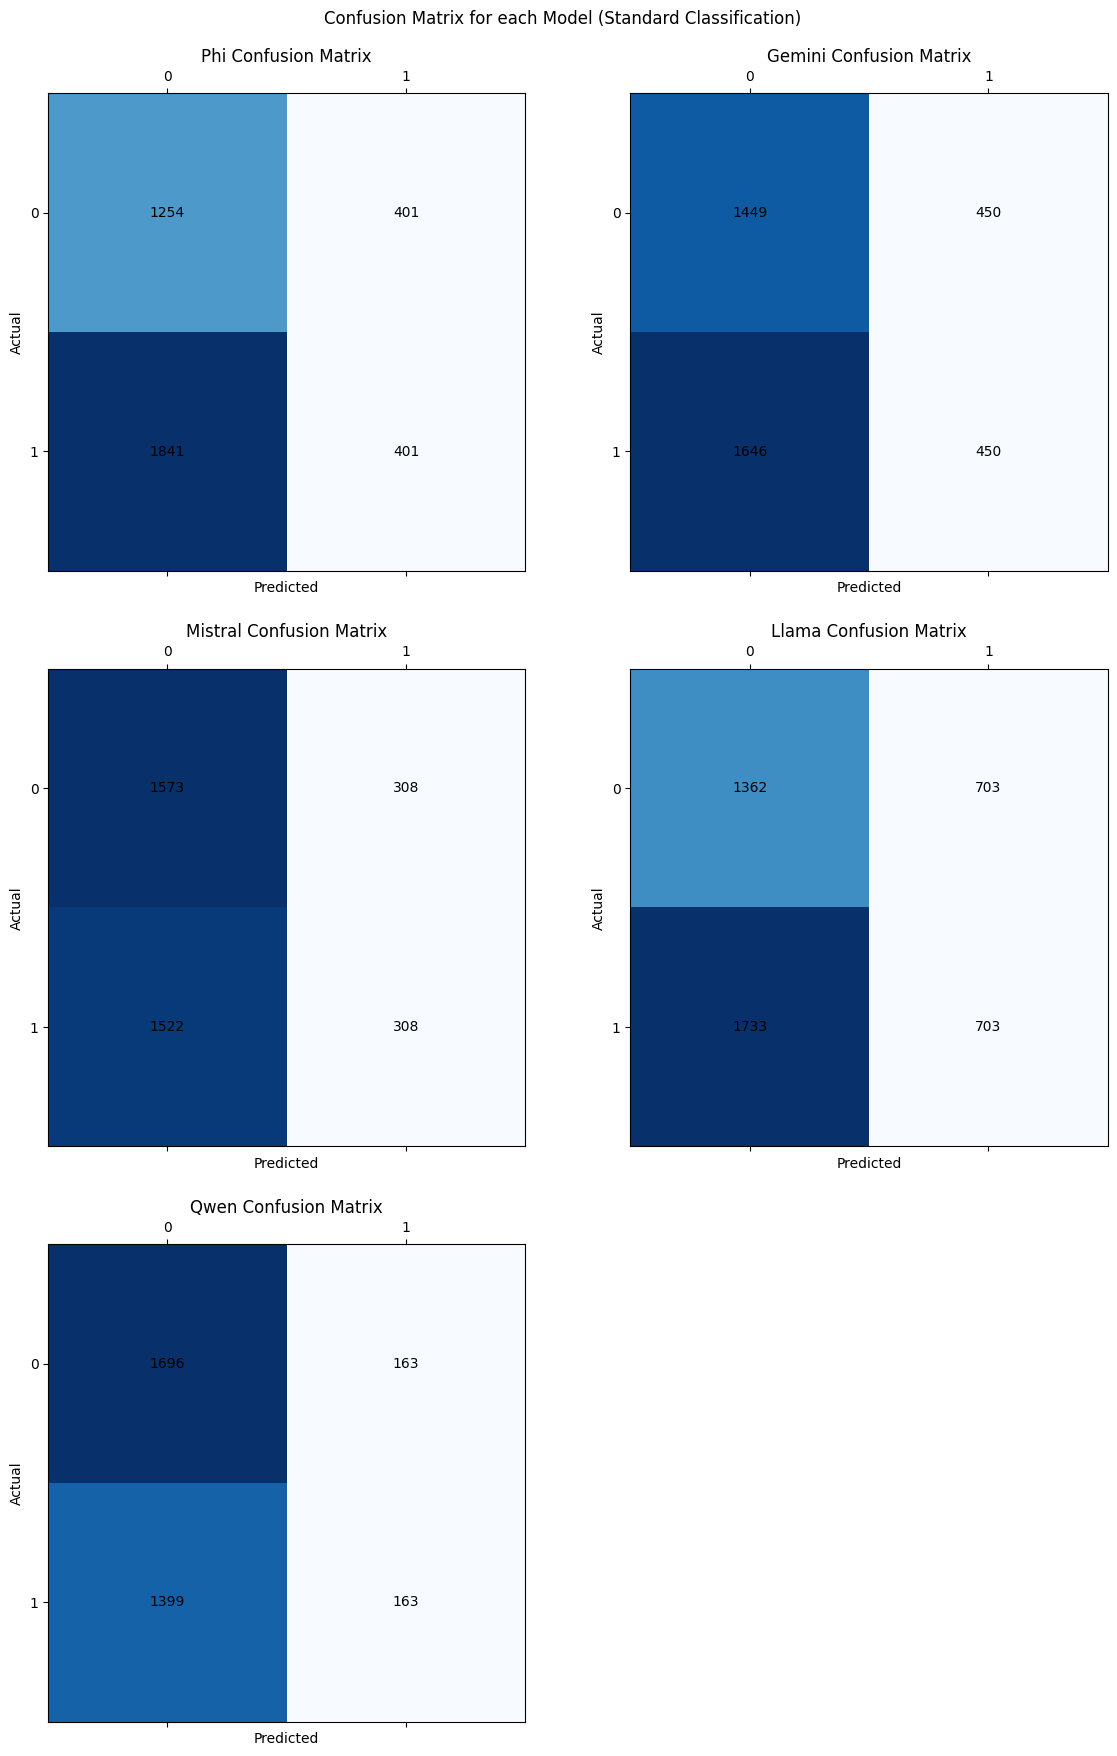

In [29]:
# Plot the confusion matrix for each model using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Plot the confusion matrix for each model
plot_confusion_matrix(phi_tp, phi_fp, phi_tn, phi_fn, "Phi", axs[0, 0])
plot_confusion_matrix(gemini_tp, gemini_fp, gemini_tn, gemini_fn, "Gemini", axs[0, 1])
plot_confusion_matrix(mistral_tp, mistral_fp, mistral_tn, mistral_fn, "Mistral", axs[1, 0])
plot_confusion_matrix(llama_tp, llama_fp, llama_tn, llama_fn, "Llama", axs[1, 1])
plot_confusion_matrix(qwen_tp, qwen_fp, qwen_tn, qwen_fn, "Qwen", axs[2, 0])

# Hide the empty subplot
fig.delaxes(axs[2, 1])

# Add a title to the figure
fig.suptitle("Confusion Matrix for each Model (Standard Classification)")

# Adjust layout to reduce distance between subplots
plt.tight_layout(pad=2.0)
plt.show()

# Save the plot as pdf file
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "standard_classification_confusion_matrix.pdf")
fig.savefig(path, bbox_inches='tight')
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "standard_classification_confusion_matrix.png")
fig.savefig(path, bbox_inches='tight')

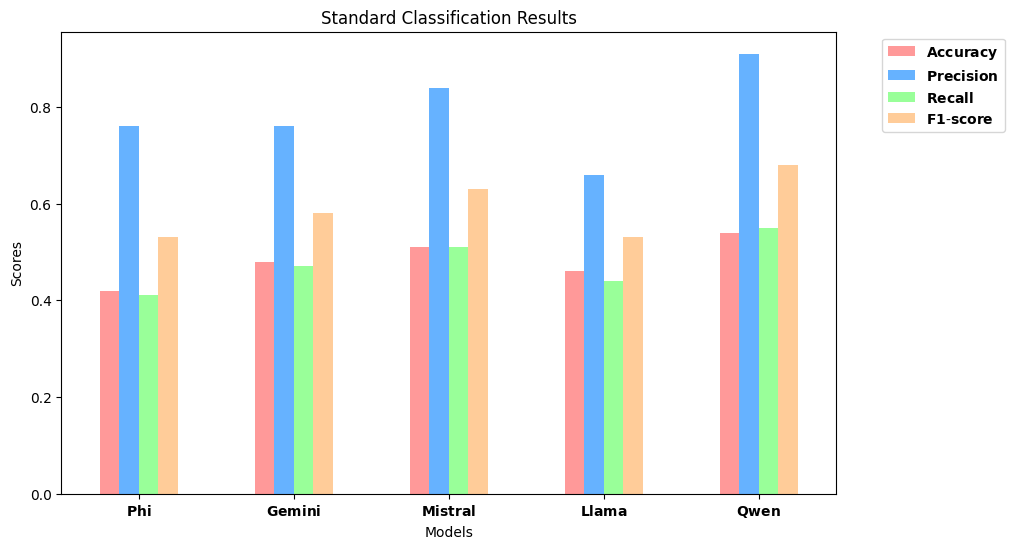

In [30]:
# Plot barplot for the results
import matplotlib.pyplot as plt

# Define the data structure
data = {
    r"$\mathbf{Models}$": [r"$\mathbf{Phi}$", r"$\mathbf{Gemini}$", r"$\mathbf{Mistral}$", r"$\mathbf{Llama}$", r"$\mathbf{Qwen}$"],
    r"$\mathbf{Accuracy}$": [phi_accuracy, gemini_accuracy, mistral_accuracy, llama_accuracy, qwen_accuracy],
    r"$\mathbf{Precision}$": [phi_precision, gemini_precision, mistral_precision, llama_precision, qwen_precision],
    r"$\mathbf{Recall}$": [phi_recall, gemini_recall, mistral_recall, llama_recall, qwen_recall],
    r"$\mathbf{F1\text{-}score}$": [phi_f1_score, gemini_f1_score, mistral_f1_score, llama_f1_score, qwen_f1_score]
}

# Create a dataframe
df = pd.DataFrame(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the barplot
df.plot(x=r"$\mathbf{Models}$", kind='bar', ax=ax, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])

# Set the title and labels
ax.set_title("Standard Classification Results")
ax.set_ylabel("Scores")
ax.set_xlabel("Models")

# Place the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the models names horizontally
plt.xticks(rotation=0)

# Display the plot
plt.show()

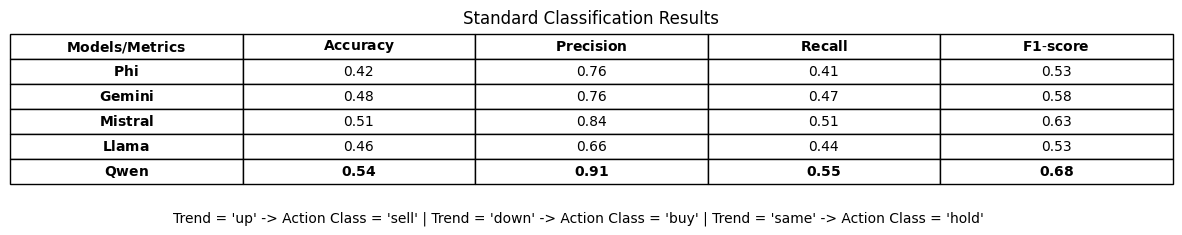

In [31]:
# Plot the results in a table
import matplotlib.pyplot as plt
import numpy as np

# Define the data structure
data = {
    r"$\mathbf{Models / Metrics}$": [r"$\mathbf{Phi}$", r"$\mathbf{Gemini}$", r"$\mathbf{Mistral}$", r"$\mathbf{Llama}$", r"$\mathbf{Qwen}$"],
    r"$\mathbf{Accuracy}$": [phi_accuracy, gemini_accuracy, mistral_accuracy, llama_accuracy, qwen_accuracy],
    r"$\mathbf{Precision}$": [phi_precision, gemini_precision, mistral_precision, llama_precision, qwen_precision],
    r"$\mathbf{Recall}$": [phi_recall, gemini_recall, mistral_recall, llama_recall, qwen_recall],
    r"$\mathbf{F1\text{-}score}$": [phi_f1_score, gemini_f1_score, mistral_f1_score, llama_f1_score, qwen_f1_score]
}

# Create a dataframe
df = pd.DataFrame(data)

# Bold the maximum value in each column
df[r"$\mathbf{Accuracy}$"] = bold_max(df, r"$\mathbf{Accuracy}$")
df[r"$\mathbf{Precision}$"] = bold_max(df, r"$\mathbf{Precision}$")
df[r"$\mathbf{Recall}$"] = bold_max(df, r"$\mathbf{Recall}$")
df[r"$\mathbf{F1\text{-}score}$"] = bold_max(df, r"$\mathbf{F1\text{-}score}$")

# Create a figure and axis for displaying the table
fig, ax = plt.subplots(figsize=(10, 2))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust table scale for better readability
table.scale(1.5, 1.5)

# Set a title for the table
plt.title(f"Standard Classification Results")

# Add a text below the table
# trend = 'up' -> action_class = 'sell'
# trend = 'down' -> action_class = 'buy'
# trend = 'same' -> action_class = 'hold'
plt.figtext(0.5, -0.05, "Trend = 'up' -> Action Class = 'sell' | Trend = 'down' -> Action Class = 'buy' | Trend = 'same' -> Action Class = 'hold'", ha='center', va='center')

# Display the table
plt.show()

# Save the plot as pdf file
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "standard_classification_results_table.pdf")
fig.savefig(path, bbox_inches='tight')
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "standard_classification_results_table.png")
fig.savefig(path, bbox_inches='tight')

## My Classification

In [32]:
# Count the number of times each model predict the trend correctly
# trend = 'up' -> action_class = 'sell' or 'hold'
# trend = 'down' -> action_class = 'buy' or 'hold'
# trend = 'same' -> action_class = 'hold' or 'sell' or 'buy'

# Initialize the counters
phi_tp, phi_fp, phi_tn, phi_fn, gemini_tp, gemini_fp, gemini_tn, gemini_fn, mistral_tp, mistral_fp, mistral_tn, mistral_fn, llama_tp, llama_fp, llama_tn, llama_fn, qwen_tp, qwen_fp, qwen_tn, qwen_fn = initialize_counters()

# Compute the number of rows in the datasets
num_rows = df_phi.shape[0]

# True positive: trend = 'up' and action_class in ['sell', 'hold'], trend = 'down' and action_class in ['buy', 'hold'], trend = 'same' and action_class in ['hold', 'sell', 'buy']
# In words: the model predicts the trend correctly and the action class is correct
def count_true_positive(trend, action_class):
    if trend == 'up' and action_class in ['sell', 'hold']:
        return 1
    if trend == 'down' and action_class in ['buy', 'hold']:
        return 1
    if trend == 'same' and action_class in ['hold', 'sell', 'buy']:
        return 1
    return 0

# False positive: trend = 'up' and action_class in ['buy', 'hold'], trend = 'down' and action_class in ['sell', 'hold'], trend = 'same' and action_class in ['sell', 'buy']
# In words: the model predicts the trend incorrectly and the action class is incorrect
def count_false_positive(trend, action_class):
    if trend == 'up' and action_class in ['buy', 'hold']:
        return 1
    if trend == 'down' and action_class in ['sell', 'hold']:
        return 1
    if trend == 'same' and action_class in ['sell', 'buy']:
        return 1
    return 0

# True negative: trend = 'up' and action_class in ['buy', 'hold'], trend = 'down' and action_class in ['sell', 'hold'], trend = 'same' and action_class in ['sell', 'buy']
# In words: the model predicts the trend correctly and the action class is incorrect
def count_true_negative(trend, action_class):
    if trend == 'up' and action_class in ['buy', 'hold']:
        return 1
    if trend == 'down' and action_class in ['sell', 'hold']:
        return 1
    if trend == 'same' and action_class in ['sell', 'buy']:
        return 1
    return 0

# False negative: trend = 'up' and action_class in ['sell', 'hold'], trend = 'down' and action_class in ['buy', 'hold'], trend = 'same' and action_class in ['hold', 'sell', 'buy']
# In words: the model predicts the trend incorrectly and the action class is correct
def count_false_negative(trend, action_class):
    if trend == 'up' and action_class in ['sell', 'hold']:
        return 0
    if trend == 'down' and action_class in ['buy', 'hold']:
        return 0
    if trend == 'same' and action_class in ['hold', 'sell', 'buy']:
        return 0
    return 1

# Loop through the rows of the dataset
for row_phi, row_gemini, row_mistral, row_llama, row_qwen in tqdm(zip(df_phi.itertuples(), df_gemini.itertuples(), df_mistral.itertuples(), df_llama.itertuples(), df_qwen.itertuples()), total=num_rows):
    # Extract the trend and action class for each model
    trend_phi, action_class_phi = row_phi.trend, row_phi.action_class
    trend_gemini, action_class_gemini = row_gemini.trend, row_gemini.action_class
    trend_mistral, action_class_mistral = row_mistral.trend, row_mistral.action_class
    trend_llama, action_class_llama = row_llama.trend, row_llama.action_class
    trend_qwen, action_class_qwen = row_qwen.trend, row_qwen.action_class

    # Update the counters for Phi
    phi_tp += count_true_positive(trend_phi, action_class_phi)
    phi_fp += count_false_positive(trend_phi, action_class_phi)
    phi_tn += count_true_negative(trend_phi, action_class_phi)
    phi_fn += count_false_negative(trend_phi, action_class_phi)

    # Update the counters for Gemini
    gemini_tp += count_true_positive(trend_gemini, action_class_gemini)
    gemini_fp += count_false_positive(trend_gemini, action_class_gemini)
    gemini_tn += count_true_negative(trend_gemini, action_class_gemini)
    gemini_fn += count_false_negative(trend_gemini, action_class_gemini)

    # Update the counters for Mistral
    mistral_tp += count_true_positive(trend_mistral, action_class_mistral)
    mistral_fp += count_false_positive(trend_mistral, action_class_mistral)
    mistral_tn += count_true_negative(trend_mistral, action_class_mistral)
    mistral_fn += count_false_negative(trend_mistral, action_class_mistral)

    # Update the counters for Llama
    llama_tp += count_true_positive(trend_llama, action_class_llama)
    llama_fp += count_false_positive(trend_llama, action_class_llama)
    llama_tn += count_true_negative(trend_llama, action_class_llama)
    llama_fn += count_false_negative(trend_llama, action_class_llama)

    # Update the counters for Qwen
    qwen_tp += count_true_positive(trend_qwen, action_class_qwen)
    qwen_fp += count_false_positive(trend_qwen, action_class_qwen)
    qwen_tn += count_true_negative(trend_qwen, action_class_qwen)
    qwen_fn += count_false_negative(trend_qwen, action_class_qwen)

100%|██████████| 3095/3095 [00:00<00:00, 63839.77it/s]


In [33]:
# Calculate the total number of rows
total_rows = df_phi.shape[0]

# Calculate the metrics for each model
phi_accuracy, phi_precision, phi_recall, phi_f1_score = calculate_metrics(phi_tp, phi_fp, phi_tn, phi_fn)
gemini_accuracy, gemini_precision, gemini_recall, gemini_f1_score = calculate_metrics(gemini_tp, gemini_fp, gemini_tn, gemini_fn)
mistral_accuracy, mistral_precision, mistral_recall, mistral_f1_score = calculate_metrics(mistral_tp, mistral_fp, mistral_tn, mistral_fn)
llama_accuracy, llama_precision, llama_recall, llama_f1_score = calculate_metrics(llama_tp, llama_fp, llama_tn, llama_fn)
qwen_accuracy, qwen_precision, qwen_recall, qwen_f1_score = calculate_metrics(qwen_tp, qwen_fp, qwen_tn, qwen_fn)

# Display the results for each model
print(f"Phi - Accuracy: {phi_accuracy:.2f}, Precision: {phi_precision:.2f}, Recall: {phi_recall:.2f}, F1-Score: {phi_f1_score:.2f}")
print(f"Gemini - Accuracy: {gemini_accuracy:.2f}, Precision: {gemini_precision:.2f}, Recall: {gemini_recall:.2f}, F1-Score: {gemini_f1_score:.2f}")
print(f"Mistral - Accuracy: {mistral_accuracy:.2f}, Precision: {mistral_precision:.2f}, Recall: {mistral_recall:.2f}, F1-Score: {mistral_f1_score:.2f}")
print(f"Llama - Accuracy: {llama_accuracy:.2f}, Precision: {llama_precision:.2f}, Recall: {llama_recall:.2f}, F1-Score: {llama_f1_score:.2f}")
print(f"Qwen - Accuracy: {qwen_accuracy:.2f}, Precision: {qwen_precision:.2f}, Recall: {qwen_recall:.2f}, F1-Score: {qwen_f1_score:.2f}")

Phi - Accuracy: 0.68, Precision: 0.60, Recall: 0.89, F1-Score: 0.72
Gemini - Accuracy: 0.69, Precision: 0.63, Recall: 0.89, F1-Score: 0.74
Mistral - Accuracy: 0.73, Precision: 0.66, Recall: 0.96, F1-Score: 0.78
Llama - Accuracy: 0.70, Precision: 0.62, Recall: 0.92, F1-Score: 0.74
Qwen - Accuracy: 0.75, Precision: 0.68, Recall: 0.97, F1-Score: 0.80


In [34]:
# Save the results in a csv file
path = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "flexible_classification_results.csv")

data = {
    "Model": ["Phi", "Gemini", "Mistral", "Llama", "Qwen"],
    "Total rows": [total_rows, total_rows, total_rows, total_rows, total_rows],
    "True positives": [phi_tp, gemini_tp, mistral_tp, llama_tp, qwen_tp],
    "False positives": [phi_fp, gemini_fp, mistral_fp, llama_fp, qwen_fp],
    "True negatives": [phi_tn, gemini_tn, mistral_tn, llama_tn, qwen_tn],
    "False negatives": [phi_fn, gemini_fn, mistral_fn, llama_fn, qwen_fn],
    "Accuracy": [phi_accuracy, gemini_accuracy, mistral_accuracy, llama_accuracy, qwen_accuracy],
    "Precision": [phi_precision, gemini_precision, mistral_precision, llama_precision, qwen_precision],
    "Recall": [phi_recall, gemini_recall, mistral_recall, llama_recall, qwen_recall],
    "F1-score": [phi_f1_score, gemini_f1_score, mistral_f1_score, llama_f1_score, qwen_f1_score]
}

df = pd.DataFrame(data)
df.to_csv(path, index=False)

In [35]:
# Read the results from the file
path = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "flexible_classification_results.csv")
df = pd.read_csv(path)
df

,Model,Total rows,True positives,False positives,True negatives,False negatives,Accuracy,Precision,Recall,F1-score
0,Phi,3095,2768,1841,1841,327,0.68,0.60,0.89,0.72
1,Gemini,3095,2756,1646,1646,339,0.69,0.63,0.89,0.74
2,Mistral,3095,2964,1522,1522,131,0.73,0.66,0.96,0.78
3,Llama,3095,2833,1733,1733,262,0.70,0.62,0.92,0.74
4,Qwen,3095,2997,1399,1399,98,0.75,0.68,0.97,0.80


In [36]:
# Save the values into variables
total_rows = df['Total rows'][0]
phi_tp = df['True positives'][0]
phi_fp = df['False positives'][0]
phi_tn = df['True negatives'][0]
phi_fn = df['False negatives'][0]
phi_accuracy = df['Accuracy'][0]
phi_precision = df['Precision'][0]
phi_recall = df['Recall'][0]
phi_f1_score = df['F1-score'][0]    
gemini_tp = df['True positives'][1]
gemini_fp = df['False positives'][1]
gemini_tn = df['True negatives'][1]
gemini_fn = df['False negatives'][1]
gemini_accuracy = df['Accuracy'][1]
gemini_precision = df['Precision'][1]
gemini_recall = df['Recall'][1]
gemini_f1_score = df['F1-score'][1]
mistral_tp = df['True positives'][2]
mistral_fp = df['False positives'][2]
mistral_tn = df['True negatives'][2]
mistral_fn = df['False negatives'][2]
mistral_accuracy = df['Accuracy'][2]
mistral_precision = df['Precision'][2]
mistral_recall = df['Recall'][2]
mistral_f1_score = df['F1-score'][2]
llama_tp = df['True positives'][3]
llama_fp = df['False positives'][3]
llama_tn = df['True negatives'][3]
llama_fn = df['False negatives'][3]
llama_accuracy = df['Accuracy'][3]
llama_precision = df['Precision'][3]
llama_recall = df['Recall'][3]
llama_f1_score = df['F1-score'][3]
qwen_tp = df['True positives'][4]
qwen_fp = df['False positives'][4]
qwen_tn = df['True negatives'][4]
qwen_fn = df['False negatives'][4]
qwen_accuracy = df['Accuracy'][4]
qwen_precision = df['Precision'][4]
qwen_recall = df['Recall'][4]
qwen_f1_score = df['F1-score'][4]

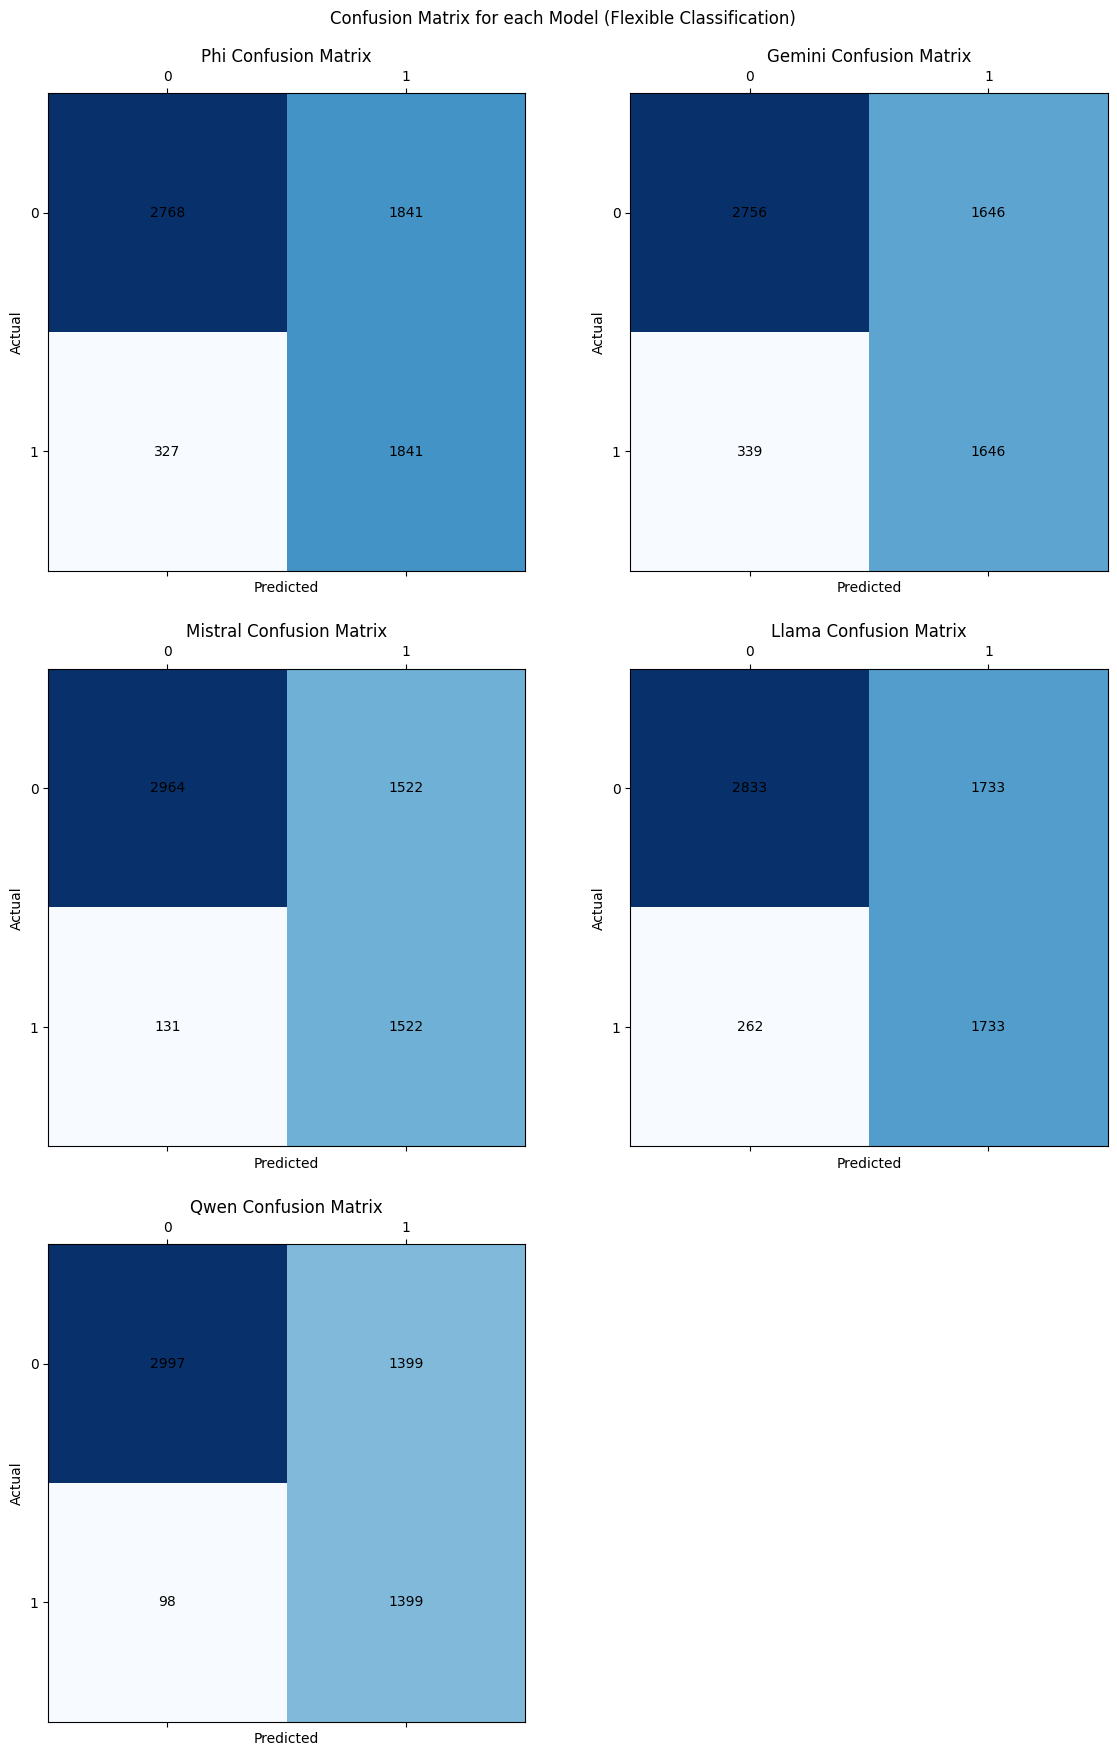

In [37]:
# Plot the confusion matrix for each model using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Plot the confusion matrix for each model
plot_confusion_matrix(phi_tp, phi_fp, phi_tn, phi_fn, "Phi", axs[0, 0])
plot_confusion_matrix(gemini_tp, gemini_fp, gemini_tn, gemini_fn, "Gemini", axs[0, 1])
plot_confusion_matrix(mistral_tp, mistral_fp, mistral_tn, mistral_fn, "Mistral", axs[1, 0])
plot_confusion_matrix(llama_tp, llama_fp, llama_tn, llama_fn, "Llama", axs[1, 1])
plot_confusion_matrix(qwen_tp, qwen_fp, qwen_tn, qwen_fn, "Qwen", axs[2, 0])

# Hide the empty subplot
fig.delaxes(axs[2, 1])

# Add a title to the figure
fig.suptitle("Confusion Matrix for each Model (Flexible Classification)")

# Adjust layout to reduce distance between subplots
plt.tight_layout(pad=2.0)
plt.show()

# Save the plot as pdf file
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "flexible_classification_confusion_matrix.pdf")
fig.savefig(path, bbox_inches='tight')
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "flexible_classification_confusion_matrix.png")
fig.savefig(path, bbox_inches='tight')

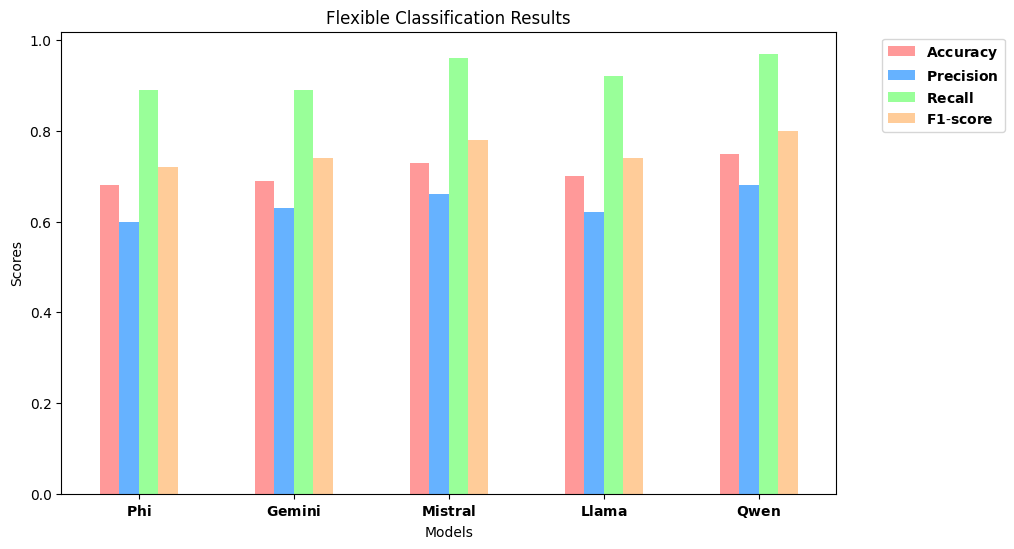

In [38]:
# Plot barplot for the results
import matplotlib.pyplot as plt

# Define the data structure
data = {
    r"$\mathbf{Models}$": [r"$\mathbf{Phi}$", r"$\mathbf{Gemini}$", r"$\mathbf{Mistral}$", r"$\mathbf{Llama}$", r"$\mathbf{Qwen}$"],
    r"$\mathbf{Accuracy}$": [phi_accuracy, gemini_accuracy, mistral_accuracy, llama_accuracy, qwen_accuracy],
    r"$\mathbf{Precision}$": [phi_precision, gemini_precision, mistral_precision, llama_precision, qwen_precision],
    r"$\mathbf{Recall}$": [phi_recall, gemini_recall, mistral_recall, llama_recall, qwen_recall],
    r"$\mathbf{F1\text{-}score}$": [phi_f1_score, gemini_f1_score, mistral_f1_score, llama_f1_score, qwen_f1_score]
}

# Create a dataframe
df = pd.DataFrame(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the barplot
df.plot(x=r"$\mathbf{Models}$", kind='bar', ax=ax, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])

# Set the title and labels
ax.set_title("Flexible Classification Results")
ax.set_ylabel("Scores")
ax.set_xlabel("Models")

# Set the models names horizontally
plt.xticks(rotation=0)

# Place the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

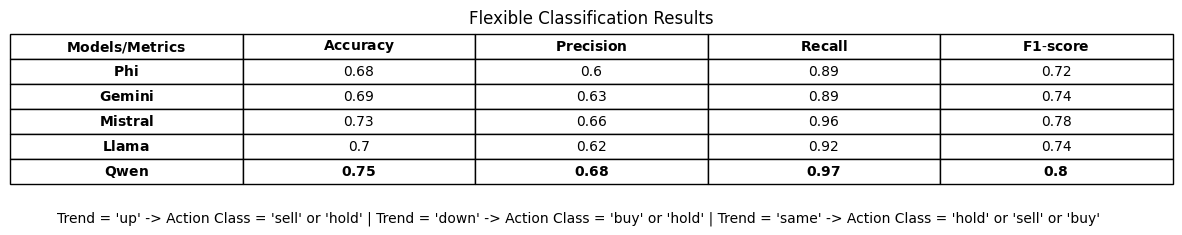

In [39]:
# Plot the results in a table
import matplotlib.pyplot as plt
import numpy as np

# Define the data structure
data = {
    r"$\mathbf{Models / Metrics}$": [r"$\mathbf{Phi}$", r"$\mathbf{Gemini}$", r"$\mathbf{Mistral}$", r"$\mathbf{Llama}$", r"$\mathbf{Qwen}$"],
    r"$\mathbf{Accuracy}$": [phi_accuracy, gemini_accuracy, mistral_accuracy, llama_accuracy, qwen_accuracy],
    r"$\mathbf{Precision}$": [phi_precision, gemini_precision, mistral_precision, llama_precision, qwen_precision],
    r"$\mathbf{Recall}$": [phi_recall, gemini_recall, mistral_recall, llama_recall, qwen_recall],
    r"$\mathbf{F1\text{-}score}$": [phi_f1_score, gemini_f1_score, mistral_f1_score, llama_f1_score, qwen_f1_score]
}

# Create a dataframe
df = pd.DataFrame(data)

# Bold the maximum value in each column
df[r"$\mathbf{Accuracy}$"] = bold_max(df, r"$\mathbf{Accuracy}$")
df[r"$\mathbf{Precision}$"] = bold_max(df, r"$\mathbf{Precision}$")
df[r"$\mathbf{Recall}$"] = bold_max(df, r"$\mathbf{Recall}$")
df[r"$\mathbf{F1\text{-}score}$"] = bold_max(df, r"$\mathbf{F1\text{-}score}$")

# Create a figure and axis for displaying the table
fig, ax = plt.subplots(figsize=(10, 2))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust table scale for better readability
table.scale(1.5, 1.5)

# Set a title for the table
plt.title(f"Flexible Classification Results")

# Add a text below the table
# trend = 'up' -> action_class = 'sell' or 'hold'
# trend = 'down' -> action_class = 'buy' or 'hold'
# trend = 'same' -> action_class = 'hold' or 'sell' or 'buy'

plt.figtext(0.5, -0.05, "Trend = 'up' -> Action Class = 'sell' or 'hold' | Trend = 'down' -> Action Class = 'buy' or 'hold' | Trend = 'same' -> Action Class = 'hold' or 'sell' or 'buy'", ha='center', va='center')

# Display the table
plt.show()

# Save the plot as pdf file
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "flexible_classification_results_table.pdf")
fig.savefig(path, bbox_inches='tight')
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "flexible_classification_results_table.png")
fig.savefig(path, bbox_inches='tight')